# Find Waldo
Using our own custom data split, we train an object detector to identify Waldo

In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn ## Pre-trained model from PyTorch
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import shutil

import config
from xml_to_csv import convert_each_xml_to_csv
from bbox_regressor import ObjectDetector
from custom_tensor_dataset import CustomTensorDataset

Train on GPU

In [2]:
datapath = os.getcwd()

In [3]:
numnotwaldo = len(os.listdir(datapath+'/chopped-256/notwaldo/'))
numwaldo = len(os.listdir(datapath+'/chopped-256/waldo/'))

print(f"There are {numwaldo} images of Waldo")
print(f"There are {numnotwaldo} images of not Waldo")

There are 18 images of Waldo
There are 270 images of not Waldo


## Path Initalization

In [4]:
print(f"Base path: {config.BASE_PATH}")
print(f"Annotation path: {config.ANNOTS_PATH}")
print(f"Images path: {config.IMAGES_PATH}")
print(f"Ouput path: {config.BASE_OUTPUT}")

Base path: /Users/laurenbeede/FindWaldo
Annotation path: /Users/laurenbeede/FindWaldo/annotations
Images path: /Users/laurenbeede/FindWaldo
Ouput path: /Users/laurenbeede/FindWaldo/output


Have to convert all xml files to csv for the code

In [5]:
# xml_folder = "/Users/laurenbeede/FindWaldo/annotations/imgs/bnd_box"
# output_folder = "/Users/laurenbeede/FindWaldo/csv_output"

# if os.path.exists(output_folder):
#     print(f"Output folder {output_folder} already exists.")
# else:
#     convert_each_xml_to_csv(xml_folder, output_folder)

Starting training for image resolution:  256
[INFO] loading dataset...
[ERROR] File does not exist: /Users/laurenbeede/FindWaldo/chopped-256/label/filename
[INFO] total training samples: 230...
[INFO] total test samples: 58...
[INFO] saving testing image paths...


/Users/laurenbeede/miniconda3/envs/sp25/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/laurenbeede/miniconda3/envs/sp25/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ObjectDetector(
  (baseModel): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
 

  5%|▌         | 1/20 [00:02<00:39,  2.06s/it]

[INFO] EPOCH: 1/20
Train loss: 0.768228, Train accuracy: 0.8826
Val loss: 0.936020, Val accuracy: 0.9310


 10%|█         | 2/20 [00:03<00:29,  1.62s/it]

[INFO] EPOCH: 2/20
Train loss: 0.489318, Train accuracy: 0.9391
Val loss: 0.855286, Val accuracy: 0.9310


 15%|█▌        | 3/20 [00:04<00:25,  1.47s/it]

[INFO] EPOCH: 3/20
Train loss: 0.474545, Train accuracy: 0.9391
Val loss: 0.799477, Val accuracy: 0.9310


 20%|██        | 4/20 [00:05<00:22,  1.41s/it]

[INFO] EPOCH: 4/20
Train loss: 0.429890, Train accuracy: 0.9391
Val loss: 0.710920, Val accuracy: 0.9310


 25%|██▌       | 5/20 [00:07<00:20,  1.38s/it]

[INFO] EPOCH: 5/20
Train loss: 0.361914, Train accuracy: 0.9391
Val loss: 0.654669, Val accuracy: 0.9310


 30%|███       | 6/20 [00:08<00:18,  1.34s/it]

[INFO] EPOCH: 6/20
Train loss: 0.332535, Train accuracy: 0.9391
Val loss: 0.611395, Val accuracy: 0.9310


 35%|███▌      | 7/20 [00:09<00:17,  1.33s/it]

[INFO] EPOCH: 7/20
Train loss: 0.305605, Train accuracy: 0.9391
Val loss: 0.574897, Val accuracy: 0.9310


 40%|████      | 8/20 [00:11<00:16,  1.33s/it]

[INFO] EPOCH: 8/20
Train loss: 0.290630, Train accuracy: 0.9391
Val loss: 0.552138, Val accuracy: 0.9310


 45%|████▌     | 9/20 [00:12<00:14,  1.34s/it]

[INFO] EPOCH: 9/20
Train loss: 0.297409, Train accuracy: 0.9391
Val loss: 0.539897, Val accuracy: 0.9310


 50%|█████     | 10/20 [00:13<00:13,  1.34s/it]

[INFO] EPOCH: 10/20
Train loss: 0.289872, Train accuracy: 0.9391
Val loss: 0.529473, Val accuracy: 0.9310


 55%|█████▌    | 11/20 [00:15<00:12,  1.34s/it]

[INFO] EPOCH: 11/20
Train loss: 0.329474, Train accuracy: 0.9391
Val loss: 0.526825, Val accuracy: 0.9310


 60%|██████    | 12/20 [00:16<00:10,  1.34s/it]

[INFO] EPOCH: 12/20
Train loss: 0.315583, Train accuracy: 0.9391
Val loss: 0.525403, Val accuracy: 0.9310


 65%|██████▌   | 13/20 [00:17<00:09,  1.35s/it]

[INFO] EPOCH: 13/20
Train loss: 0.314800, Train accuracy: 0.9391
Val loss: 0.522329, Val accuracy: 0.9310


 70%|███████   | 14/20 [00:19<00:08,  1.34s/it]

[INFO] EPOCH: 14/20
Train loss: 0.418905, Train accuracy: 0.9391
Val loss: 0.521512, Val accuracy: 0.9310


 75%|███████▌  | 15/20 [00:20<00:06,  1.34s/it]

[INFO] EPOCH: 15/20
Train loss: 0.290493, Train accuracy: 0.9391
Val loss: 0.531657, Val accuracy: 0.9310


 80%|████████  | 16/20 [00:21<00:05,  1.34s/it]

[INFO] EPOCH: 16/20
Train loss: 0.344845, Train accuracy: 0.9391
Val loss: 0.521812, Val accuracy: 0.9310


 85%|████████▌ | 17/20 [00:23<00:04,  1.34s/it]

[INFO] EPOCH: 17/20
Train loss: 0.253276, Train accuracy: 0.9391
Val loss: 0.520809, Val accuracy: 0.9310


 90%|█████████ | 18/20 [00:24<00:02,  1.33s/it]

[INFO] EPOCH: 18/20
Train loss: 0.246581, Train accuracy: 0.9391
Val loss: 0.522027, Val accuracy: 0.9310


 95%|█████████▌| 19/20 [00:25<00:01,  1.34s/it]

[INFO] EPOCH: 19/20
Train loss: 0.303284, Train accuracy: 0.9391
Val loss: 0.524545, Val accuracy: 0.9310


100%|██████████| 20/20 [00:27<00:00,  1.37s/it]

[INFO] EPOCH: 20/20
Train loss: 0.248010, Train accuracy: 0.9391
Val loss: 0.520776, Val accuracy: 0.9310
[INFO] total time taken to train the model: 27.38s
[INFO] saving object detector model...
[INFO] saving label encoder...


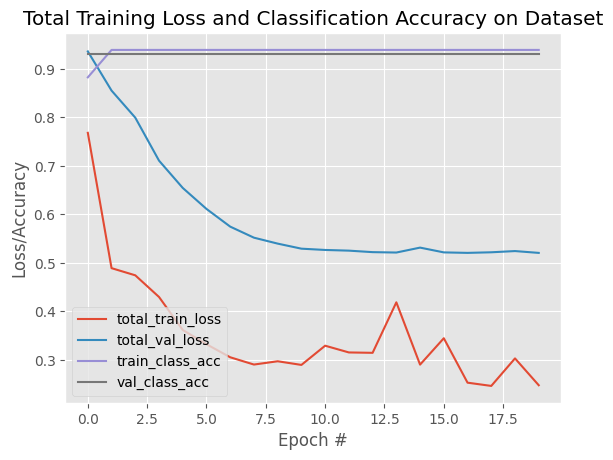

In [6]:
%run train.py

In [12]:
%run predict.py -i /Users/laurenbeede/FindWaldo/output/test_paths.txt

[INFO] loading object detector...


/Users/laurenbeede/FindWaldo/predict.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(config.MODEL_PATH).to(config.DEVICE)
